## importing dataset 

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml("mnist_784")

In [3]:
# mnist.data
# mnist.target

## separating features and labels

In [4]:
X,y = mnist["data"],mnist["target"]

## cheking random digit and its image

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


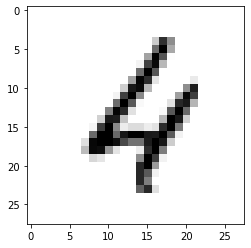

In [6]:
import numpy as np
random_digit = np.array(X.iloc[3984])
random_image = random_digit.reshape(28,28)
plt.imshow(random_image,cmap = matplotlib.cm.binary,interpolation="nearest")

In [7]:
y[3984]

'4'

## scaling and splitting data

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [9]:
shuffle = np.random.permutation(8000)

In [10]:
scale = StandardScaler()
scaled_X = scale.fit_transform(X)

In [11]:
x_train,x_test,y_train,y_test = train_test_split(scaled_X,y,test_size=0.3,random_state=42)

### checking if digit is 5

In [12]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
train_5 = (y_train==5) 
test_5  = (y_test==5 )

## model selection

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
model = LogisticRegression(tol=0.1,solver="lbfgs",max_iter=1000)
model.fit(x_train,train_5)

LogisticRegression(max_iter=1000, tol=0.1)

In [15]:
model.predict([random_digit])

array([False])

## checking accuracy of model

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
cv = cross_val_score(model,x_train,train_5,cv= 4,scoring="accuracy")

In [18]:
cv.mean()

0.9741224489795918

### for digit that is not 5

In [19]:
n5_train =(y_train!=5)
n5_test = (y_test!=5)

In [20]:
clf = LogisticRegression(tol=0.1,solver="lbfgs",max_iter=1000)
clf.fit(x_train,n5_train)

LogisticRegression(max_iter=1000, tol=0.1)

In [21]:
predicted = clf.predict(x_test)

In [22]:
predicted

array([ True,  True, False, ...,  True,  True, False])

### calculating accuracy for prediction of digit as not 5

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_predict

In [24]:
cvp = cross_val_predict(clf,x_train,n5_train,cv=10)

In [25]:
cvp

array([ True,  True,  True, ...,  True,  True,  True])

### confusion matrix

In [26]:
cm = confusion_matrix(n5_train,cvp)
cm

array([[ 3597,   801],
       [  469, 44133]], dtype=int64)

### precision score

In [27]:
precision_score(n5_train,cvp)

0.9821738549873147

### recall score

In [28]:
recall_score(n5_train,cvp)

0.9894847764674229

### f1 score

In [29]:
f1_score(n5_train,cvp)

0.9858157612580415